In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv("dioxide.csv") 



In [5]:
# Display basic dataset info
print(df.head())


  Category;1990;1991;1992;1993;1994;1995;1996;1997;1998;1999;2000;2001;2002;2003;2004;2005;2006;2007;2008;2009;2010;2011;2012;2013;2014;2015;2016
0  Domestic aviation;0.636;0.79;0.79;0.898;0.953;...                                                                                             
1  Cars;5.947;6.020;6.228;6.498;6.688;6.978;7.127...                                                                                             
2  Light commercial vehicles;1.293;1.296;1.343;1....                                                                                             
3  Heavy duty trucks and buses;2.182;2.174;2.257;...                                                                                             
4  Motorcycles;0.035;0.036;0.037;0.038;0.039;0.04...                                                                                             


In [6]:
print(df.isnull().sum())  # Check for missing values in each column


Category;1990;1991;1992;1993;1994;1995;1996;1997;1998;1999;2000;2001;2002;2003;2004;2005;2006;2007;2008;2009;2010;2011;2012;2013;2014;2015;2016    0
dtype: int64


In [7]:
# Convert all columns except "Category" to numeric
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Display dataset info again
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                           --------------  ----- 
 0   Category;1990;1991;1992;1993;1994;1995;1996;1997;1998;1999;2000;2001;2002;2003;2004;2005;2006;2007;2008;2009;2010;2011;2012;2013;2014;2015;2016  9 non-null      object
dtypes: object(1)
memory usage: 204.0+ bytes
None


In [8]:
print(df.columns)  # To see the exact column names



Index(['Category;1990;1991;1992;1993;1994;1995;1996;1997;1998;1999;2000;2001;2002;2003;2004;2005;2006;2007;2008;2009;2010;2011;2012;2013;2014;2015;2016'], dtype='object')


In [9]:
df = pd.read_csv("dioxide.csv", sep=";", engine="python")  # Use ';' as separator
df.columns = df.columns.str.strip()  # Remove any extra spaces in column names


In [10]:
for category in df["Category"].unique():
    print(category)


Domestic aviation
Cars
Light commercial vehicles
Heavy duty trucks and buses
Motorcycles
Railways
Navigation
Other
Total


In [11]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")


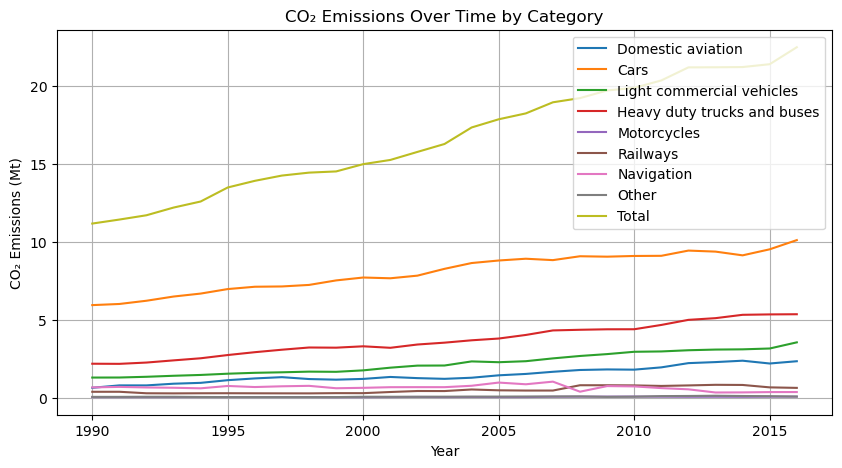

In [12]:
import matplotlib.pyplot as plt

# Set years as X-axis (convert column names from string to int)
years = df.columns[1:].astype(int)

plt.figure(figsize=(10, 5))

# Plot emissions for each category
for category in df["Category"].unique():
    emissions = df[df["Category"] == category].iloc[:, 1:].values.flatten()
    plt.plot(years, emissions, label=category)

plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Mt)")
plt.title("CO₂ Emissions Over Time by Category")
plt.legend()
plt.grid(True)
plt.show()


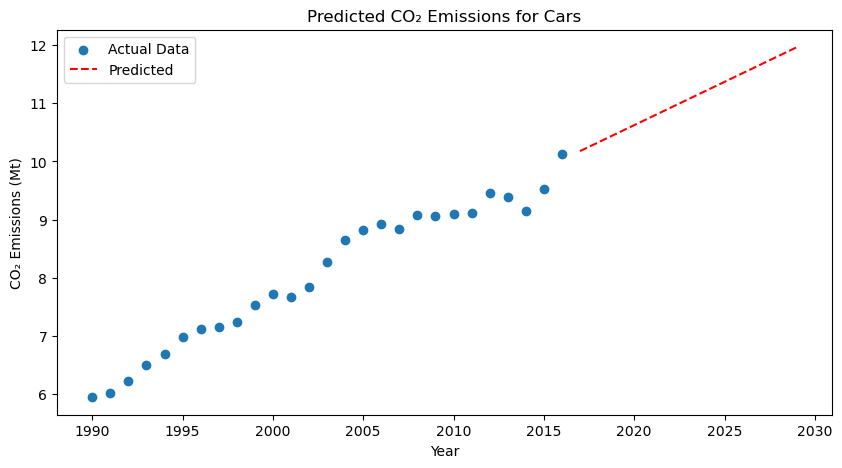

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(years).reshape(-1, 1)  # Years as feature
y = df[df["Category"] == "Cars"].iloc[:, 1:].values.flatten()  # Example: Using "Cars" emissions as target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future emissions
future_years = np.array(range(2017, 2030)).reshape(-1, 1)  # Predicting beyond 2016
future_predictions = model.predict(future_years)

# Plot predictions
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Actual Data")
plt.plot(future_years, future_predictions, color="red", linestyle="--", label="Predicted")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Mt)")
plt.title("Predicted CO₂ Emissions for Cars")
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on test data
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100



# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R² Score: 0.98
Model Accuracy: 97.57%


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate accuracy on training data
y_train_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Training Data Accuracy:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f} ({r2*100:.2f}%)")

# User Input Prediction
print("\nEnter vehicle details for CO2 emission prediction:")
engine_size = float(input("Engine Size (L) (e.g., 2.0): "))
cylinders = int(input("Number of Cylinders (e.g., 4): "))
fuel_consumption = float(input("Fuel Consumption (L/100km) (e.g., 8.5): "))

# Convert input to array and reshape
user_input = np.array([[engine_size, cylinders, fuel_consumption]])
predicted_co2 = model.predict(user_input)

print(f"Predicted CO2 Emissions: {predicted_co2[0]:.2f} g/km")


Training Data Accuracy:
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
R² Score: 0.96 (95.89%)

Enter vehicle details for CO2 emission prediction:


Engine Size (L) (e.g., 2.0):  2.0
Number of Cylinders (e.g., 4):  4
Fuel Consumption (L/100km) (e.g., 8.5):  8.5


ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.